In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv('/content/drive/MyDrive/DATASET/HR_comma_sep.csv')

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [10]:
print(data.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

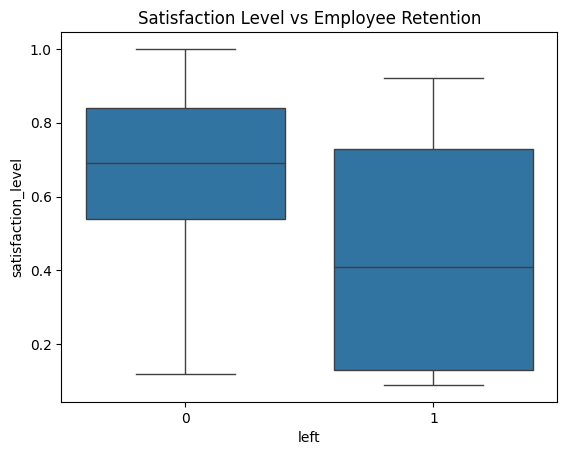

In [11]:
# Visualize the relationship between satisfaction level and employee retention
sns.boxplot(x='left', y='satisfaction_level', data=data)
plt.title('Satisfaction Level vs Employee Retention')
plt.show()

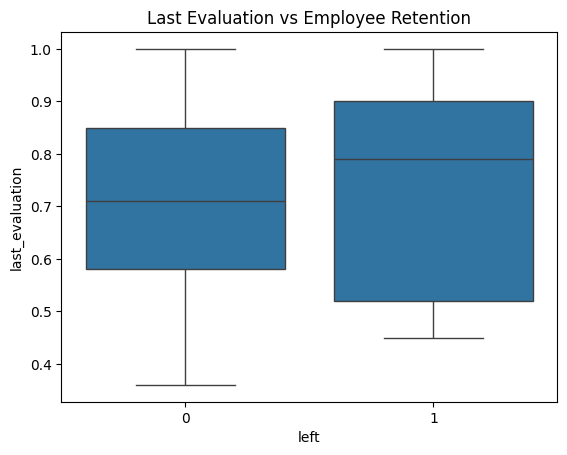

In [12]:
# Visualize the relationship between last evaluation and employee retention
sns.boxplot(x='left', y='last_evaluation', data=data)
plt.title('Last Evaluation vs Employee Retention')
plt.show()

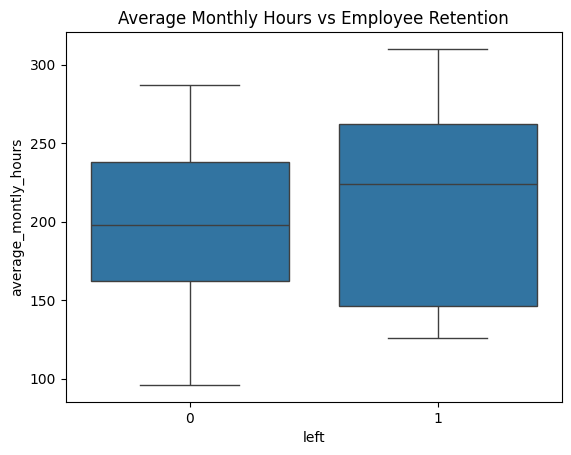

In [13]:
# Visualize the relationship between average monthly hours and employee retention
sns.boxplot(x='left', y='average_montly_hours', data=data)
plt.title('Average Monthly Hours vs Employee Retention')
plt.show()

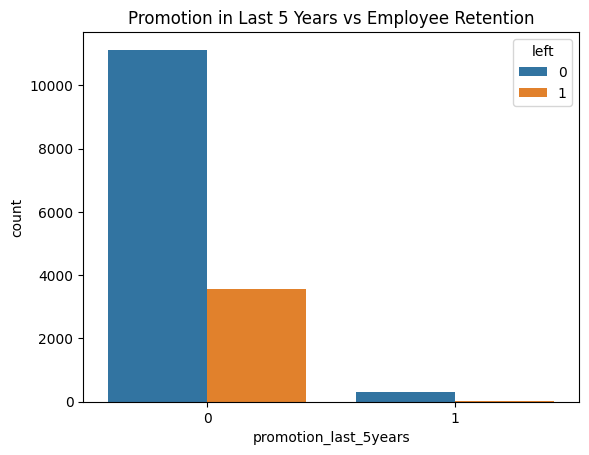

In [14]:
# Visualize the relationship between promotion history and employee retention
sns.countplot(x='promotion_last_5years', hue='left', data=data)
plt.title('Promotion in Last 5 Years vs Employee Retention')
plt.show()

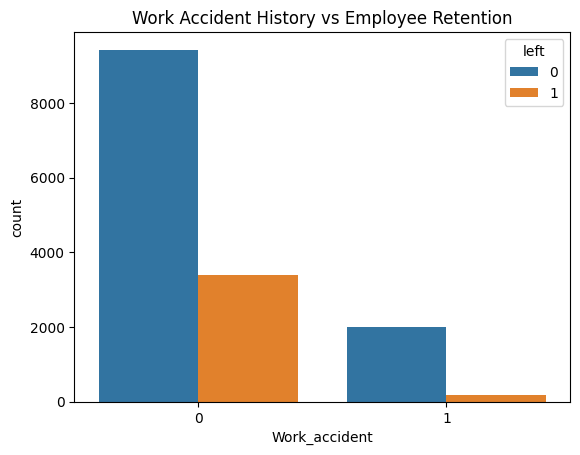

In [15]:
# Visualize the relationship between work accidents and employee retention
sns.countplot(x='Work_accident', hue='left', data=data)
plt.title('Work Accident History vs Employee Retention')
plt.show()


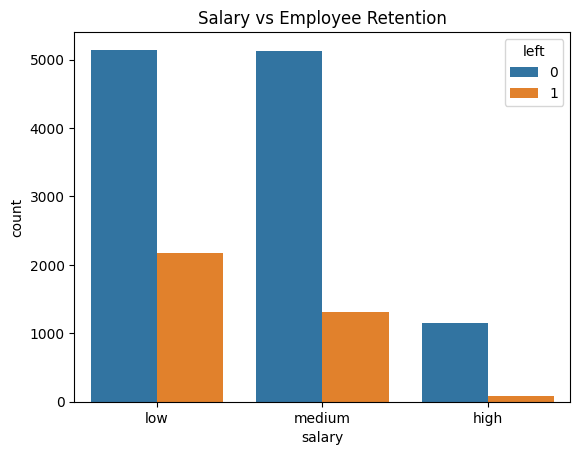

In [16]:
# Visualize the relationship between salary and employee retention
sns.countplot(x='salary', hue='left', data=data)
plt.title('Salary vs Employee Retention')
plt.show()

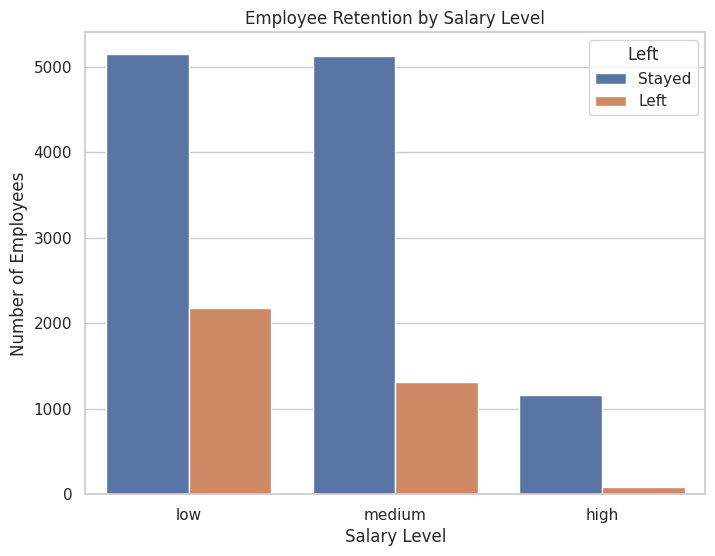

In [17]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='salary', hue='left', data=data)
plt.title('Employee Retention by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()

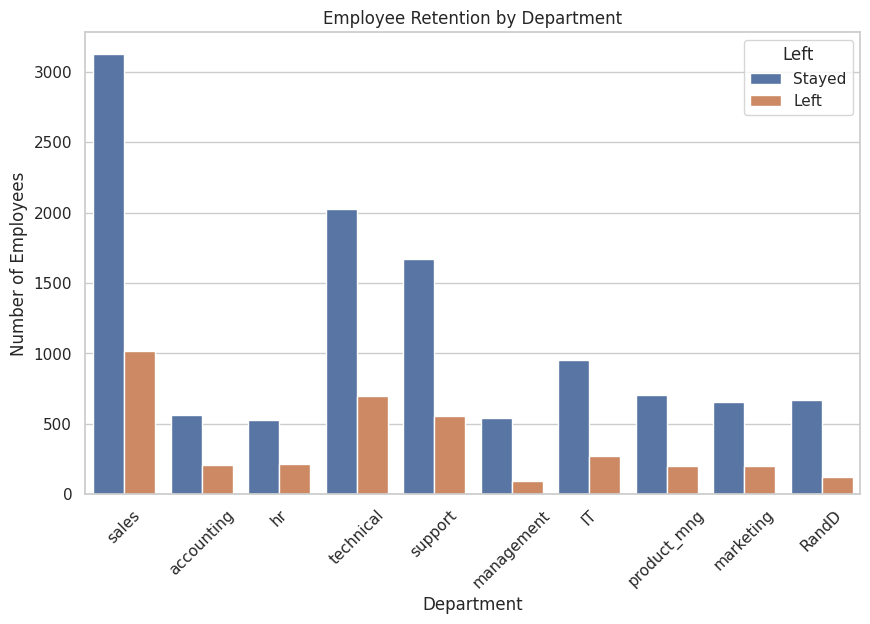

In [19]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='left', data=data)
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Left', loc='upper right', labels=['Stayed', 'Left'])
plt.show()


In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant variables
X = data[['satisfaction_level', 'average_montly_hours', 'salary', 'Department']]
y = data['left']

# Encode categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['satisfaction_level', 'average_montly_hours']),
        ('cat', OneHotEncoder(), ['salary', 'Department'])
    ],
    remainder='passthrough'
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7646666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.50      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.73      0.76      0.73      3000


Confusion Matrix:
 [[2132  162]
 [ 544  162]]
